# EE228 -  HW#2 - Neural Network for MNIST

**Due**: May 5th 11.59pm
<div style="margin-bottom: 15px; padding: 15px; color: #31708f; background-color: #d9edf7; border: 1px solid #bce8f1; border-radius: 5px;">
    
<b><font size=+2>Enter my information below:</font></b></br></br>

  <b>(full) Name</b>: Chuanye Xiong
  </br>
  <b>Student ID Number</b>:  862170704
  </br></br>
    
<b>By submitting this notebook, I assert that the work below is my own work, completed for this course.  Except where explicitly cited, none of the portions of this notebook are duplicated from anyone else's work or my own previous work.</b>
</div>


# **Part 1: Apply the normalization on the training and testing data [2 points]**
In this part, I'm writing the code to normalize the training and testing data.

In [97]:
import numpy as np
import matplotlib.pyplot as plt

In [98]:
import tensorflow.keras.datasets.mnist as mnist ##I just used the tensorflow to download the data.

In [99]:
(X_trainset, y_trainset), (X_testset, y_testset) = mnist.load_data()

In [100]:
X_trainset_float = X_trainset.astype('float')   ##I didnt divide 255 here, it can be normalized later
X_testset_float = X_testset.astype('float') 



X_trainset_784 = X_trainset.reshape((X_trainset_float.shape[0], X_trainset_float.shape[1]*X_trainset_float.shape[2]))
X_testset_784 = X_testset.reshape((X_testset_float.shape[0], X_testset_float.shape[1]*X_testset_float.shape[2]))



##normalize training data
mean_X_train = np.mean(X_trainset_784, axis=1)
mean_X_train_2d = mean_X_train.reshape(-1,1)

std_X_train = np.std(X_trainset_784, axis=1)
std_X_train_2d = std_X_train.reshape(-1,1)

X_train_normal = (X_trainset_784 - mean_X_train_2d) / std_X_train_2d

## adding another dimention for bias
train_ones = np.ones((X_trainset_float.shape[0], 1))
X_train_785 = np.hstack((X_train_normal, train_ones))


##normalize testing data
mean_X_test = np.mean(X_testset_784, axis=1)
mean_X_test_2d = mean_X_test.reshape(-1,1)

std_X_test = np.std(X_testset_784, axis=1)
std_X_test_2d = std_X_test.reshape(-1,1)
X_test_normal = (X_testset_784 - mean_X_test_2d) / std_X_test_2d

##adding another dimention for bias
test_ones = np.ones((X_testset_float.shape[0], 1))
X_test_785 = np.hstack((X_test_normal, test_ones))



## transfer the labels into 2 classes
ytrain_2Class = np.where(y_trainset > 4, 1, 0)
ytest_2Class = np.where(y_testset > 4, 1, 0)

print("###########Training data##########")
print("shape of X trainset:", X_train_785.shape)
print("shape of y trainset:",ytrain_2Class.shape )
print("##########First 20 examples of y trainset in 2 classes########")
print(ytrain_2Class[:20])

print("\n###########Testing data###########")
print("shape of X testset:", X_test_785.shape)
print("shape of y trainset:",ytest_2Class.shape )
print("##########First 20 examples of y testset in 2 classes########")
print(ytest_2Class[:20])


###########Training data##########
shape of X trainset: (60000, 785)
shape of y trainset: (60000,)
##########First 20 examples of y trainset in 2 classes########
[1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1]

###########Testing data###########
shape of X testset: (10000, 785)
shape of y trainset: (10000,)
##########First 20 examples of y testset in 2 classes########
[1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0]


# **Part 2: As a baseline, train a linear classifier and quadratic loss. Report its test accuracy [2 points]**
In this part, I'm writing the code to apply the linear classifier. I used the HW1 code as the baseline because the foucs of this homework is not linear model. It's NN.

Baseline accuracy is: 0.8468


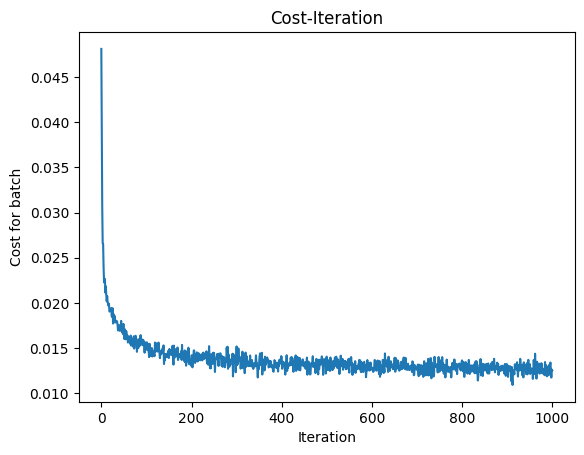

In [5]:

## X_train_785  shape: 60000X785 2d array
## ytrain_2Class shape: 60000, 1d array

## X_test_785 shape: 10000X785 2d array
## ytest_2Class shape 10000, 1d array

def MiniBatchSGD(X_all_train, y_all_train, X_test, y_test, ITR=1000, B=100, LR = 0.0001):  
    
    ## reshape the y training and testing data from 1d array to 2d array
    y_all_train = y_all_train.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    
    
    all_sample_number = X_all_train.shape[0]
    
    ## initialize W0
    W = np.zeros((1,X_all_train.shape[1]))
    
    iter = 0
    loss_list = []
    delta_W_list = []
    accuracy_list = []
    
    
    G = None  # Initialize Gradient matrix
    while (iter <= ITR):
        #print("iter:",iter)
        # generate a random permutation of row index
        
        num_of_rows_picked = B ## B=batch size, randomly pick B rows from X_all_train
        batch_index = np.random.choice(X_all_train.shape[0], size=num_of_rows_picked, replace=False)
        #get batch train data
        X_batch = X_all_train[batch_index] 
        y_batch = y_all_train[batch_index]
        
        
        ##caculate loss
        y_batch_T = y_batch.transpose()
        X_batch_T = X_batch.transpose()
        WXT_sub_yT = (W @ X_batch_T) - y_batch_T
       
        
        
        ## get the tensor vector [L2_forx1,L2_forx2,... L2_forxi]
        #L2_norm_tensor_for_batch = torch.norm(WXT_sub_yT, dim=0) 
        #print(L2_norm_tensor_for_batch)
        #loss_new = (torch.norm(L2_norm_tensor_for_batch))  / B
        
        
        squared_matrix = np.square(WXT_sub_yT)
        loss_new = np.sum(squared_matrix) / B /10.  ##L2 norm and we have 10 classes take the average
        
        
        ## if reach convergence, no need to reach to given iteration(ITR).
        #if iter != 0:
        #    if torch.abs(loss_new - loss) <= 1e-10:
        #        break
        loss = loss_new
        loss_list.append(loss)
        
        
        ## calculate gradient
        G = (WXT_sub_yT @ X_batch) / B
        #print("G=", G)
        
        delta_W = LR * G
        W = W - delta_W
        
        squared_delta_W = np.square(delta_W)
        deltaW_square_sum = np.sum(squared_delta_W)
        delta_W_list.append(deltaW_square_sum)
        #print("W=", W[:,:10])
        
        
        # calculate the accuracy at current step
        WT = W.transpose()
        y_hat = X_test @ WT
        
        ## If the value larger than 0.5, set it to be 1 others 0
        y_prediction = np.where(y_hat>0.5, 1, 0)
        
        diff = y_prediction - y_test
        norms_each_row = np.linalg.norm(diff, axis=1)
        
        right_num = np.sum(norms_each_row < 0.1)
        
        
        accuracy = right_num / y_hat.shape[0]
        
        accuracy_list.append(accuracy)
        
        iter += 1
    #print("delta_W len:",len( delta_W_list))   
    #print("iter:", iter)
    #print("len of loss_list:", len(loss_list))
    #print(loss_list)
    
    
    #plt.plot(np.arange(5), loss_list[:4])
    #plt.show()
    return W, loss_list, delta_W_list, accuracy_list, iter

##use this function
W_final, loss_list, delta_W_list, accuracy_list, iter = MiniBatchSGD(X_train_785, ytrain_2Class, X_test_785, ytest_2Class, ITR=1000, B=1000, LR = 0.001)

print("Baseline accuracy is:",accuracy_list[-1])
plt.plot(np.arange(iter), loss_list)
plt.xlabel("Iteration")
plt.ylabel("Cost for batch")
plt.title("Cost-Iteration")
plt.show()

As we can see, the accuracy of the baseline around 0.85.
In summary, we have trained the linear classifier to get the basline, which is the accuracy around 0.85.

# **Part 3: Train a neural network classifier with quadratic loss. Plot the progress of the test and training accuracy (y-axis) as a function of the iteration counter t (x-axis). Report the final test accuracy for the following choices [7 points]**

  <b>k</b>= 5
  </br>
  <b>k</b>=40 
  </br>
  <b>k</b>=100
  </br>
In this part, I'm writing the code for the neural network classier.

In [168]:
## X_train_785  shape: 60000X785 2d array
## ytrain_2Class shape: 60000, 1d array

## X_test_785 shape: 10000X785 2d array
## ytest_2Class shape 10000, 1d array
def calculate_acc(y_test, X_test, W, v):
    W_T = W.transpose()
    Z1 = X_test @ W_T
    a1 = np.where(Z1<0, 0, Z1)
    Z2 = a1 @ v
    
    result = np.where(Z2<0.5, 0, 1)
    diff = y_test - result
    
    norms_each_row = np.linalg.norm(diff, axis=1)
    right_num = np.sum(norms_each_row < 0.01)
    acc = right_num / y_test.shape[0]
    return acc

def get_sigmoid(x):
    sigmoid = 1 / (1 + np.exp(-x))
    return sigmoid
    
#quadratic_or_logistic=True, using quadratic loss
#quadratic_or_logistic=False, using logistic loss
def Shallow_NN(X_train, y_train, X_test, y_test, epoch=10, B=10, k=10, LR=0.001, quadratic_loss = True): 
    #reshape the y_train, y_test to be 2d array
    
    ## get the data of all the training sample, should be 60000
    n_all_train_sample = X_train.shape[0]
    dimension = X_train.shape[1]
    
    ##reshape the y_train, y_test from 1d array to 2d array
    y_train = y_train.reshape(-1,1) ## shape like 60000*1
    
    y_test = y_test.reshape(-1,1)       ## shape like 10000*1
    
    
    
    #initialize W and v to be zero
    W =  np.random.normal(loc=0, scale=np.sqrt(1/dimension), size=(k,dimension))
    
    tmp_v = np.random.normal(loc=0, scale=np.sqrt(1/k), size=(1,k))
    v = tmp_v.transpose() ##v is (k,1) array
    
    iter = 0
    ##max step##   ####for test only
    max_step = 100000000
    
    
    loss_list = []
    train_accuracy_list = []
    test_accuracy_list = []
    
    delW_list = []
    delv_list = []
    
    n_divided_trainset = n_all_train_sample // B
    

    for i in range(epoch):  
        if iter == max_step: ###
            break
            
        for j in range(n_divided_trainset):
            
            X_batch = X_train[j*B:j*B+B]
            
            y_batch = y_train[j*B:j*B+B]
            
            
            
            ##do the forward calculation
            W_T = W.transpose()
            Z1 = X_batch @ W_T ## Z1 shape like B*k, which is the hidden layer before ReLU
            a1 = np.where(Z1<0, 0, Z1) ## a1 shape like B*k, which is the hidden layer after ReLU
            
            Z2 = a1 @ v ## Z2 shape like B*1, which is the output before ReLU
            
            a2 = Z2 ## a2 shape like B*1, which is the hidden layer after ReLU
            
            if quadratic_loss == True:
                
                diff = y_batch - a2
            #print("before######",diff)
            #diff = abs(diff)
            #print(diff)
                squared_matrix = np.square(diff)
                dL_dyhat = (-2) * diff  ## B*1 vector
            #print("after######", diff)
                loss = np.sum(squared_matrix) /B  ##calculate loss
            
            else:  ##calculate the logistic loss
                sigmoid = get_sigmoid(a2)
                loss_array = (-1)*(y_batch)*np.log10(sigmoid) - (1-y_batch)*np.log10(1-sigmoid)
                loss = loss_array.sum()
                
            if (iter%1000==0):
                loss_list.append(loss)
            
            
            if quadratic_loss == False:
                dL_dyhat = get_sigmoid(a2) - y_batch
            
            dZ2_dv = a1.transpose()  ## a1_T, shape like k*B
            
            dL_dv = dZ2_dv @  dL_dyhat  ### k*1
            v -= (LR * dL_dv)  ##update v
            delv = np.sum(np.square(dL_dv))
            delv_list.append(delv)
            
            
            ##update W
            dZ2_da1 = v.transpose()   ## dZ2_da1 is a 1*k 2d array
            da1_dZ1 = np.where(Z1<0, 0, 1) ## da1_dZ1 is B*k like, and only filled with 0,1
            
            #multiple: dyhat_dZ2 * dZ2_da1 * da1_dZ1
            
            
            #print("shape of dyhat_dZ1:", dyhat_dZ1.shape)
            #print("shape of X_batch:", X_batch.shape)
            dL_dZ1 = (dL_dyhat @ dZ2_da1) * da1_dZ1 ###B*k
            dL_dw = dL_dZ1.transpose() @ X_batch
            W -=  LR * dL_dw  ##update W
            delW = np.sum(np.square(dL_dw))
            delW_list.append(delW)
            
            if(iter%1000==0):
                #get the test accuracy using y_test, X_test
                test_accuracy = calculate_acc(y_test, X_test, W, v)
                test_accuracy_list.append(test_accuracy)
                
                #get the train accuracy using the y_train, X_train
                train_accuracy = calculate_acc(y_train, X_train, W, v)
                train_accuracy_list.append(train_accuracy)
                
            
            
            iter+=1 ##update step counter
            if iter== max_step:
                break
    return W, v, loss_list, train_accuracy_list, test_accuracy_list, delW_list, delv_list, iter

## X_train_785  shape: 60000X785 2d array
## ytrain_2Class shape: 60000, 1d array

## X_test_785 shape: 10000X785 2d array
## ytest_2Class shape 10000, 1d array
#W_final, v_final, loss_list,train_accuracy_list, test_accuracy_list, delW_list, delv_list, iter = Shallow_NN(X_train_785, ytrain_2Class, X_test_785, ytest_2Class, epoch=10, B=10, k=50, LR=0.0001, quadratic_loss= False)



#print("delW", delW_list)
#print("delv", delv_list)



Based on the function I wrote above, we are colecting the data for:</br>
  <b>k</b>= 5
  </br>
  <b>k</b>=40 
  </br>
  <b>k</b>=100
  </br>


In [133]:
W_final_k5_quad, v_final_k5_quad, loss_list_k5_quad, train_accuracy_list_k5_quad, test_accuracy_list_k5_quad, delW_list_k5_quad, delv_list_k5_quad, iter = Shallow_NN(X_train_785, ytrain_2Class, X_test_785, ytest_2Class, epoch=10, B=10, k=5, LR=0.0001, quadratic_loss= True)


In [134]:
W_final_k40_quad, v_final_k40_quad, loss_list_k40_quad, train_accuracy_list_k40_quad, test_accuracy_list_k40_quad, delW_list_k40_quad, delv_list_k40_quad, iter = Shallow_NN(X_train_785, ytrain_2Class, X_test_785, ytest_2Class, epoch=10, B=10, k=40, LR=0.0001, quadratic_loss= True)


In [135]:
W_final_k200_quad, v_final_k200_quad, loss_list_k200_quad, train_accuracy_list_k200_quad, test_accuracy_list_k200_quad, delW_list_k200_quad, delv_list_k200_quad, iter = Shallow_NN(X_train_785, ytrain_2Class, X_test_785, ytest_2Class, epoch=10, B=10, k=40, LR=0.0001, quadratic_loss= True)


#########Reported NN accuracy for quadratic loss###########
k=5 Final test accuracy: 0.931
k=40 Final test accuracy: 0.9679
k=200 Final test accuracy: 0.9666


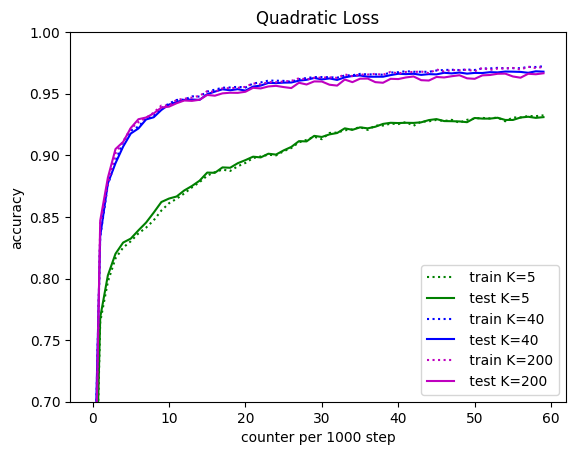

In [143]:
print("#########Reported NN accuracy for quadratic loss###########")
print("k=5 Final test accuracy:", test_accuracy_list_k5_quad[-1])
print("k=40 Final test accuracy:", test_accuracy_list_k40_quad[-1])
print("k=200 Final test accuracy:", test_accuracy_list_k200_quad[-1])
###plot the progress of accuracy as the iteration counter (K=5)
plt.plot(np.arange(len(loss_list)), train_accuracy_list_k5_quad, label=' train K=5',color='g', linestyle=':')
plt.plot(np.arange(len(loss_list)), test_accuracy_list_k5_quad, label=' test K=5',color='g', linestyle='-')

###plot the progress of accuracy as the iteration counter (K=40)
plt.plot(np.arange(len(loss_list)), train_accuracy_list_k40_quad, label=' train K=40',color='b', linestyle=':')
plt.plot(np.arange(len(loss_list)), test_accuracy_list_k40_quad, label=' test K=40',color='b', linestyle='-')

###plot the progress of accuracy as the iteration counter (K=200)
plt.plot(np.arange(len(loss_list)), train_accuracy_list_k200_quad, label=' train K=200',color='m', linestyle=':')
plt.plot(np.arange(len(loss_list)), test_accuracy_list_k200_quad, label=' test K=200',color='m', linestyle='-')
plt.legend()
plt.ylim([0.7, 1])
plt.xlabel("counter per 1000 step")
plt.ylabel("accuracy")
plt.title("Quadratic Loss")
plt.show()
#plt.plot(np.arange(len(loss_list)), test_accuracy_list)
#plt.plot(np.arange(len(loss_list)), loss_list)
#plt.legend(["Train accuracy", "Test accuracy", "loss"], loc=0)


 **Comments about the role of hidden units k on the ease of optimization and accuracy**
 </br>
** **
1. More nodes in the hidden layer (more hidden unit) will make the optimization easier. As we can see in the plot, for k=40 and k=200, the accuracy will reach to the convergence faster than k=5.</br>
** **
2. More hidden units k will make the accuracy higher, but when the k reach to a certain number, the accuracy will not further increase and reach to the limitation. Basically, the accuracy of k=40 and k=200 are the same, around 0.967. The k=5 accuracy, is just 0.931.</br>
** **
3. With the optimization, the testing Accuracy is generally slightly lower than training accuracy (especially in the converge region). This is because the testing data set, is unknown for our model, the training dataset is what we used for training our model.

# **Part 4: Train a neural network classifier with logistic loss, repeat step 3[7pts]**

 **In this part, I set the parameter of the Shallow_NN function above I defined "quadratic_loss = False", means we are using the logistic loss to calculate the gradient**
 </br>
 </br>
 **We will directly compare the logistic loss and quadratic loss in part 5**

In [ ]:
## quadratic_loss = False means we are using the logistic loss for now.
W_final_k5_logis, v_final_k5_logis, loss_list_k5_logis, train_accuracy_list_k5_logis, test_accuracy_list_k5_logis, delW_list_k5_logis, delv_list_k5_logis, iter = Shallow_NN(X_train_785, ytrain_2Class, X_test_785, ytest_2Class, epoch=10, B=10, k=5, LR=0.0001, quadratic_loss= False)


In [145]:
W_final_k40_logis, v_final_k40_logis, loss_list_k40_logis, train_accuracy_list_k40_logis, test_accuracy_list_k40_logis, delW_list_k40_logis, delv_list_k40_logis, iter = Shallow_NN(X_train_785, ytrain_2Class, X_test_785, ytest_2Class, epoch=10, B=10, k=40, LR=0.0001, quadratic_loss= False)


In [146]:
W_final_k200_logis, v_final_k200_logis, loss_list_k200_logis, train_accuracy_list_k200_logis, test_accuracy_list_k200_logis, delW_list_k200_logis, delv_list_k200_logis, iter = Shallow_NN(X_train_785, ytrain_2Class, X_test_785, ytest_2Class, epoch=10, B=10, k=200, LR=0.0001, quadratic_loss= False)


#########Reported NN accuracy for logistic loss###########
k=5 Final test accuracy: 0.936
k=40 Final test accuracy: 0.9643
k=200 Final test accuracy: 0.9663


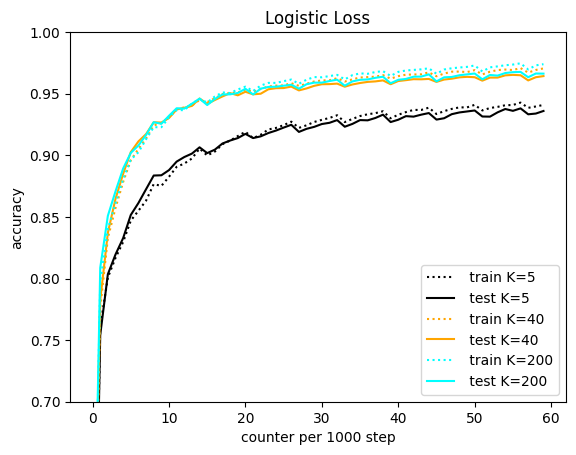

In [148]:
print("#########Reported NN accuracy for logistic loss###########")
print("k=5 Final test accuracy:", test_accuracy_list_k5_logis[-1])
print("k=40 Final test accuracy:", test_accuracy_list_k40_logis[-1])
print("k=200 Final test accuracy:", test_accuracy_list_k200_logis[-1])
###plot the progress of accuracy as the iteration counter (K=5)
plt.plot(np.arange(len(loss_list_k5_logis)), train_accuracy_list_k5_logis, label=' train K=5',color='k', linestyle=':')
plt.plot(np.arange(len(loss_list_k5_logis)), test_accuracy_list_k5_logis, label=' test K=5',color='k', linestyle='-')

###plot the progress of accuracy as the iteration counter (K=40)
plt.plot(np.arange(len(loss_list_k5_logis)), train_accuracy_list_k40_logis, label=' train K=40',color='orange', linestyle=':')
plt.plot(np.arange(len(loss_list_k5_logis)), test_accuracy_list_k40_logis, label=' test K=40',color='orange', linestyle='-')

###plot the progress of accuracy as the iteration counter (K=200)
plt.plot(np.arange(len(loss_list_k5_logis)), train_accuracy_list_k200_logis, label=' train K=200',color='cyan', linestyle=':')
plt.plot(np.arange(len(loss_list_k5_logis)), test_accuracy_list_k200_logis, label=' test K=200',color='cyan', linestyle='-')
plt.legend()
plt.ylim([0.7, 1])
plt.xlabel("counter per 1000 step")
plt.ylabel("accuracy")
plt.title("Logistic Loss")
plt.show()

 **Comments about the role of hidden units k on the ease of optimization and accuracy**
 </br>
** **
1. In the logistic loss model, More nodes in the hidden layer (more hidden unit) will make the optimization easier. As we can see in the plot, for k=40 and k=200, the accuracy will reach to the convergence faster than k=5.</br>
** **
2. In the logistic loss model, More hidden units k will make the accuracy higher, but when the k reach to a certain number, the accuracy will not further increase and reach to the limitation. Basically, the accuracy of k=40 and k=200 are the same(0.964 for k=40 and 0.966 for k=200). The k=5 accuracy, is just 0.936.</br>
** **
3. In the logistic loss model, With the optimization, the testing Accuracy is generally slightly lower than training accuracy (especially in the converge region). This is because the testing data set, is unknown for our model, the training dataset is what we used for training our model.

 **In the following part 5, we will directly compare the linear model and neural net. comment on the differences
between logistic and quadratic loss in terms of optimization and test/train accuracy** </br>

# **Part 5: comment on the difference between linear model and neural net. Comment on the differences between logistic and quadratic loss in terms of optimization and test/train accuracy[2pts]**

 **First I modified the code of linear_classifier to also use epoch and go over the data 10 times. Same LR=0.0001 and Batch size as 10, same quadratic loss with quaddratic NN** </br>

In [159]:
def linear_calculate_acc(W, X, y):
    
    WT = W.transpose()
    y_hat = X @ WT 
    
    ## If the value larger than 0.5, set it to be 1 others 0
    y_prediction = np.where(y_hat>0.5, 1, 0)
    diff = y_prediction - y
    norms_each_row = np.linalg.norm(diff, axis=1)
    right_num = np.sum(norms_each_row < 0.1)      
    accuracy = right_num / y_hat.shape[0]
        
    
    return accuracy    

def linear_model(X_all_train, y_all_train, X_test, y_test, epoch=10 , B=10, LR = 0.0001):  
    
    ##define max step of iteration, for debug
    max_step = 1000000000000000
    ## reshape the y training and testing data from 1d array to 2d array
    y_all_train = y_all_train.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    
    
    all_sample_number = X_all_train.shape[0]
    
    ## initialize W0
    W = np.zeros((1,X_all_train.shape[1]))
    
    iter = 0
    loss_list = []
    delta_W_list = []
    train_accuracy_list = []
    test_accuracy_list = []
    
    
    G = None  # Initialize Gradient matrix
    
    
    n_divided_trainset = all_sample_number // B
    
    for i in range(epoch):  
        if iter == max_step: ###
            break
            
        for j in range(n_divided_trainset):
            
            #the the X_batch and y_batch
            X_batch = X_all_train[j*B:j*B+B]
            y_batch = y_all_train[j*B:j*B+B]
            
            ##caculate loss
            y_batch_T = y_batch.transpose()
            X_batch_T = X_batch.transpose()
            WXT_sub_yT = (W @ X_batch_T) - y_batch_T
       
            
            squared_matrix = np.square(WXT_sub_yT)
            loss = np.sum(squared_matrix) / B /10.  ##L2 norm and we have 10 classes take the average
        
    
            if (iter%1000==0):
                loss_list.append(loss)
            
        
        
            ## calculate gradient
            G = (WXT_sub_yT @ X_batch) / B
            delta_W = LR * G
            
            W = W - delta_W
            
            if(iter%1000==0):
                squared_delta_W = np.square(delta_W)
                deltaW_square_sum = np.sum(squared_delta_W)
                delta_W_list.append(deltaW_square_sum)
        
            # calculate the accuracy at current step
            if(iter%1000==0):
                #get the test accuracy using y_test, X_test
                test_accuracy = linear_calculate_acc(W, X_test, y_test)
                test_accuracy_list.append(test_accuracy)
                
                #get the train accuracy using the y_train, X_train
                train_accuracy = linear_calculate_acc(W, X_all_train, y_all_train)
                train_accuracy_list.append(train_accuracy)
                
            
            
            
            iter += 1

    return W, loss_list, delta_W_list, train_accuracy_list, test_accuracy_list, iter

W_linear, loss_list_linear, delta_W_list_linear, train_accuracy_list_linear, test_accuracy_list_linear, iter_linear = linear_model(X_train_785, ytrain_2Class, X_test_785, ytest_2Class, epoch=10 , B=10, LR = 0.0001)



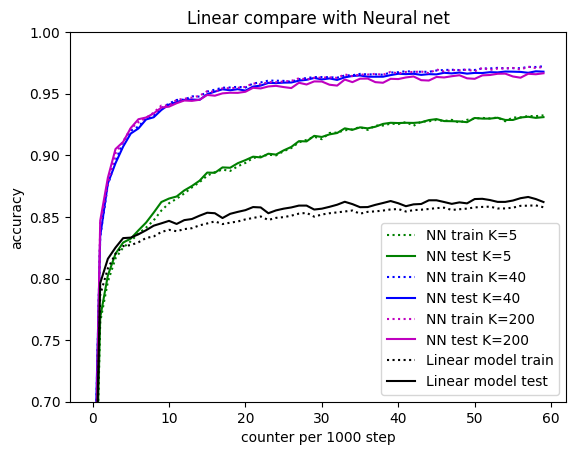

In [161]:
###plot the NN progress of accuracy as the iteration counter (K=5)
plt.plot(np.arange(len(loss_list)), train_accuracy_list_k5_quad, label='NN train K=5',color='g', linestyle=':')
plt.plot(np.arange(len(loss_list)), test_accuracy_list_k5_quad, label='NN test K=5',color='g', linestyle='-')

###plot the NN progress of accuracy as the iteration counter (K=40)
plt.plot(np.arange(len(loss_list)), train_accuracy_list_k40_quad, label='NN train K=40',color='b', linestyle=':')
plt.plot(np.arange(len(loss_list)), test_accuracy_list_k40_quad, label='NN test K=40',color='b', linestyle='-')

###plot the NN progress of accuracy as the iteration counter (K=200)
plt.plot(np.arange(len(loss_list)), train_accuracy_list_k200_quad, label='NN train K=200',color='m', linestyle=':')
plt.plot(np.arange(len(loss_list)), test_accuracy_list_k200_quad, label='NN test K=200',color='m', linestyle='-')

###For linear classifier, plot the progress of accuracy as the iteration counter
plt.plot(np.arange(len(loss_list)), train_accuracy_list_linear, label='Linear model train',color='k', linestyle=':')
plt.plot(np.arange(len(loss_list)), test_accuracy_list_linear, label='Linear model test',color='k', linestyle='-')
plt.legend()
plt.ylim([0.7, 1])
plt.xlabel("counter per 1000 step")
plt.ylabel("accuracy")
plt.title("Linear compare with Neural net")
plt.show()

 **Comments on the linear model and neural net:** </br>
 1. The accuracy of the neural net is much better than the linear model. The linear model accuracy is about 0.85 and neural net are above 0.9. Even k=5 hidden unit neural net can beat linear model.
 2. The optimization of the neural net converge easier than the linear model. Especially for Neural net k=40 and 200 hidden unit they nearly converge in 10*1000 steps.

Final accuracy of logistic loss model: 0.936
Final accuracy of quadratic loss model: 0.931


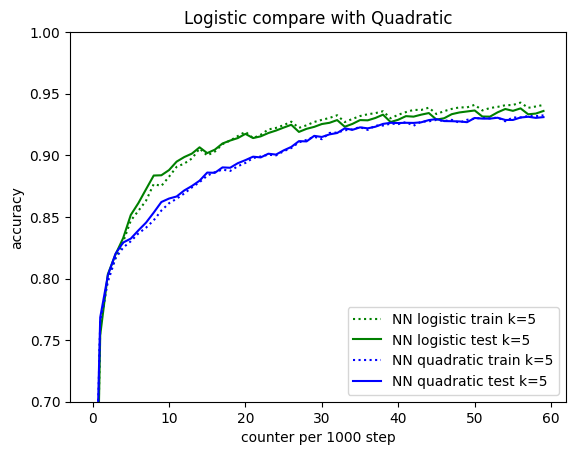

In [166]:
print("Final accuracy of logistic loss model:", test_accuracy_list_k5_logis[-1])
print("Final accuracy of quadratic loss model:", test_accuracy_list_k5_quad[-1])

###plot the NN progress of accuracy as the iteration counter (K=5)
plt.plot(np.arange(len(loss_list)), train_accuracy_list_k5_logis, label='NN logistic train k=5',color='g', linestyle=':')
plt.plot(np.arange(len(loss_list)), test_accuracy_list_k5_logis, label='NN logistic test k=5',color='g', linestyle='-')

###plot the NN progress of accuracy as the iteration counter (K=40)
plt.plot(np.arange(len(loss_list)), train_accuracy_list_k5_quad, label="NN quadratic train k=5",color='b', linestyle=':')
plt.plot(np.arange(len(loss_list)), test_accuracy_list_k5_quad, label='NN quadratic test k=5',color='b', linestyle='-')

plt.legend()
plt.ylim([0.7, 1])
plt.xlabel("counter per 1000 step")
plt.ylabel("accuracy")
plt.title("Logistic compare with Quadratic")
plt.show()

 **Comments on the Logistic loss and Quadratic loss:** </br>
 1. In terms of the optimization, the logistic loss model converge faster than quadratic loss model.
 2. In terms of the acccuracy, the accuracy of logistic loss model (0.936) is slightly higher than that of quadratic loss model (0.931).